# Final Assessment Scratch Pad

## Instructions

1. Please use only this Jupyter notebook to work on your model, and **do not use any extra files**. If you need to define helper classes or functions, feel free to do so in this notebook.
2. This template is intended to be general, but it may not cover every use case. The sections are given so that it will be easier for us to grade your submission. If your specific use case isn't addressed, **you may add new Markdown or code blocks to this notebook**. However, please **don't delete any existing blocks**.
3. If you don't think a particular section of this template is necessary for your work, **you may skip it**. Be sure to explain clearly why you decided to do so.

## Report

##### Overview
This report assesses different models to learn a mixed-input dataset without domain knowledge. To obtain a viable learning model, the dataset was cleaned by handling `NaN` values, duplicates and outliers in both tabular and image data. As there exists a class imbalance, oversampling or undersampling can be used to balance the dataset.

As this is a classification problem with 2 possible output target variable, there are common learning models which can be used, such as:
1. Decision Trees
2. Logistic Regression
3. Gradient Boosting Classifier
4. MLP

To identify the best model for a dataset without any domain knowledge, we explore the dataset and evaluate the models.

##### 1. Descriptive Analysis
The dataframe has the shape of (61305, 40), excluding the `target`. The target column is `target` which is expressed as a binary value `(0 or 1)`.

In the 40 feature variables present, there are 20 categorical features and 20 numerical features.

Next, an overview of the numerical features are obtained to observe the mean and percentiles. An overview of categorical features are obtained to observe the mode and number of unique categories per categorical feature variable.

Images are also observed to have the dimensions `7x7` with `num_channels=1`.

##### 2. Detection and Handling of Missing Values
It is observed that there are `NaN` values in the data but not the target.

There were 2 approaches adopted to handle `NaN` values.
First, a ratio of `NaN` to number of samples in a feature variable is obtained. If the number of `NaN` exceeds the threshold ( &gt 50% of the samples are `NaN`), the feature variable is dropped. There were 2 feature variables that were removed here.

Second, we impute values to the remaining `NaN` values present. If it is a numerical feature variable, we replace `NaN` with the median of the feature variable. If it is a categorical feature variable, we replace `NaN` with the mode of the categorical varibale.

There are also `NaN` values present in the images. `NaN` values are replaced with `0` which represents pure white.

##### 3. Detection and Handling of Outliers
Outliers are identified using the interquartile range and any values that exceed the `cutoff = interquartile_range * 1.5`. Outliers are then replaced by the median of the feature variable. Note that only numerical features were handled in this implementation.

It is observed that there were no outliers using this method.

##### 4. Detection and Handling of Class Imbalance 
We observe that from 61,305 samples, 54,115 is the majority class (0) and 7,190 is the minority class (1).

With oversampling, we obtain a dataframe of shape (108230, 39), with ~33MB of memory usage.
With undersampling, we obtain a dataframe of shape (14380, 39), with ~4.4MB of memory usage.

The final choice of sampling technique may differ with the performance of the model employed with 1GB memory usage constraint.

##### 5. Understanding Relationship Between Variables
Correlation between different numerical feature variables are obtained using the `Pearson correlation coefficient`. For this correlation was observed visually, refer to `6. Data Visualization`.

There were a few inferences to be made from the correlation coefficients. First, there are no feature variables that have strong correlation with target variable. They may be positive or negative but they are not strong.

There are feature variables that have similar set of correlation coefficients with other feature variables. This implies that there may be duplicates or linear dependencies between these feature variables.

##### 6. Data Visualization
The following data were visualised:
1. The distribution of numerical features in the oversampled data set. Observed to be approximately normal across most features while some are slightly skewed.
2. Histogram of target classes before and after sampling.
3. Heatmap showing correlation coefficients between feature variables and target. Note that this can use `Seaborn` but `Matplotlib` was used instead for this assessment. 

##### 7. General Preprocessing
With information gained from the earlier parts,
1. Identify duplicate columns and remove duplicate columns. (1 column was removed here)
2. Format categorical feature variables to numerical format.
    - There are categorical feature variables with unique classes in the range `[2, 1021]`.
    - Set a threshold of 200 classes.
    - Categorical features with less than 200 classes are encoded.
    - Categorical features with more than 200 classes are dropped.

    A limitation of encoding is that it assumes that there is no order in the classes of the categories. However, this is okay as we have no domain knowledge.
    The classes removed `(V20, V16)`, have very low correlation coefficient with other variables, including the target variables. Therefore, it may also be acceptable to drop.
 
##### 8. Feature Selection 
Features with the highest variance (most information) were selected. To do so, `PCA` was used to obtain 10 components.

As the transformed dataset is not interpretable after PCA transformation, there is no need to do feature engineering.

Alternatively, `MinMaxScaler` can be used to normalise the data, such that all values are within the new range of `0` and `1`.

[Post-model evaluation] After creating the models, models perform marginally better with `MinMaxScaler` over `PCA`. Furthermore, in the use of `MinMaxScaler`, all numerical feature variables were used.

##### 9. Feature Engineering
NIL -- Overlaps with `8. Feature Selection`

##### 10. Creating Models
The following models were created:
1. Random Forest Classifier (Decision Tree)
2. Logistic Regression
3. Gradient Boosting Classifier
4. Neural Networks and CNN
    - Trained on 100 epochs with Adam Optimiser and Cross-Entropy Loss
    - Architecture
        - As the data is multi-input, consider `MLP` for tabular data and `CNN` for images
        - The 2 outputs from the two models can be concatenated with `torch.cat`, followed by a fully connected layer to produce 1 output.
        - Due to the time limit and memory limit, use shallow networks.

##### 11. Model Evaluation
Note that there may be some discrepancies between metrics obtained in `main`, `scratchpad` and `Coursemology`.
Evaluation metrics were obtained with `sklearn.metrics.classification_report`
1. Random Forest Classfier
    - Precision: 0.23 
    - Recall: 0.67
    - `F1: 0.70`
2. Logistic Regression (Failed to converge)
    - Precision: 0.26
    - Recall: 0.60
    - `F1: 0.75`
3. Gradient Boosting Classifier (untuned)
    - Precision: 0.26
    - Recall: 0.67
    - `F1: 0.75`
4. MLP
    - Not considered as TLE and memory exceeded

##### 12. Hyperparameters Search
Among the models, `Gradient Boosting Classifier` was used. Hyperparameter tuning with `GridSearchCV` was used.

The following parameters were obtained:
- `learning_rate`: `0.05`
- `n_estimators`: `400`
- `max_depth`: `6`
- `max_features`: `6`

##### Conclusion
We explored the different learning models on a dataset with mixed modality input and its results, as well as performed hyperparameter tuning on the best model obtained.

##### References
[General]
- https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/

[Random Forest]
- https://www.analyticsvidhya.com/blog/2015/06/tuning-random-forest-model/

[Gradient Boosting]
- https://blog.paperspace.com/gradient-boosting-for-classification/
- https://www.analyticsvidhya.com/blog/2021/09/gradient-boosting-algorithm-a-complete-guide-for-beginners/


[Neural Networks]
- https://12ft.io/proxy?&q=https%3A%2F%2Ftowardsdatascience.com%2Fintegrating-image-and-tabular-data-for-deep-learning-9281397c7318
- https://pyimagesearch.com/2019/02/04/keras-multiple-inputs-and-mixed-data/
- https://rosenfelder.ai/multi-input-neural-network-pytorch/

[Declaration of ChatGPT use]

**PROMPT**:

Rewrite the following without using for loops use numpy broadcasting

```
for i in range(len(columns) -1):
    v = X_df[columns[i]].values
    dupCols = []
    for j in range(i + 1, len(columns)):
        if np.array_equal(v, X_df[columns[j]].values):
            colsToRemove.append(columns[j])
```

**RESPONSE**:

Sure! Here's a version that utilizes NumPy broadcasting:

```
v = X_df[columns[:-1]].values[:, np.newaxis]  # Broadcasting to create a 2D array
dupCols = np.array(columns[:-1])[np.newaxis, :]  # Broadcasting to create a 2D array
dupCols = dupCols.repeat(len(columns)-1, axis=0)  # Replicate dupCols for comparison

mask = np.equal(v, X_df[columns[1:]].values)  # Create a boolean mask for equality
dupColsToRemove = dupCols[mask.any(axis=0)]  # Extract duplicate column names
```

colsToRemove.extend(dupColsToRemove.tolist())  # Append duplicate column names to colsToRemove
Note: In this version, we utilize NumPy broadcasting to create 2D arrays for v and dupCols which allows us to perform element-wise comparison between v and the remaining columns in X_df using np.equal(). We then use np.any() along the appropriate axis to identify the columns that have at least one duplicate. Finally, we extract the duplicate column names using boolean indexing and append them to the colsToRemove list.

**PROMPT**

outliers_removed = [x for x in data if x > lower and x < upper] use brodcasting instead

**RESPONSE**
Here's an example that utilizes NumPy broadcasting to remove outliers from an array:

```
python
Copy code
import numpy as np

outliers_removed = data[(data > lower) & (data < upper)]
```
Note: In this version, we use NumPy's boolean indexing to create a boolean mask that represents the condition data > lower and data < upper. This creates a boolean array with the same shape as data, where each element is True if the corresponding element in data satisfies the condition, and False otherwise. We then use this boolean mask to index data, which returns a new array containing only the elements of data that satisfy the condition, effectively removing the outliers. This approach avoids the use of explicit loops and utilizes the broadcasting capabilities of NumPy for efficient element-wise operations.

**PROMPT**
Convert a seaborn heatmap to use matplotlib

`sns.heatmap(correlations, linewidth=0.5, cmap='coolwarm')`

**RESPONSE**
Sure! Here's an example of how you can create a heatmap using matplotlib based on the seaborn heatmap with the same parameters:

```
python
Copy code
import matplotlib.pyplot as plt
import numpy as np

# Generate some example data for the heatmap
data = np.random.rand(5, 5)
correlations = np.corrcoef(data)

# Create a heatmap using matplotlib
fig, ax = plt.subplots()
heatmap = ax.imshow(correlations, cmap='coolwarm')

# Add colorbar
cbar = plt.colorbar(heatmap)

# Set ticks and labels for x and y axes
ax.set_xticks(np.arange(correlations.shape[1]))
ax.set_yticks(np.arange(correlations.shape[0]))
ax.set_xticklabels(np.arange(correlations.shape[1]) + 1)
ax.set_yticklabels(np.arange(correlations.shape[0]) + 1)

# Add grid lines
ax.set_xticks(np.arange(correlations.shape[1] + 1) - 0.5, minor=True)
ax.set_yticks(np.arange(correlations.shape[0] + 1) - 0.5, minor=True)
ax.grid(which='minor', color='w', linewidth=0.5)
ax.tick_params(which='minor', bottom=False, left=False)

# Add colorbar label
cbar.set_label('Correlation')

# Set title and show plot
ax.set_title('Correlation Heatmap')
plt.show()
```
In this example, data is a random 5x5 array used to generate the correlation matrix, which is then plotted as a heatmap using matplotlib's imshow() function. The colormap 'coolwarm' is used for the heatmap, and a colorbar is added using plt.colorbar(). The x and y axes are labeled with tick labels using ax.set_xticks(), ax.set_yticks(), ax.set_xticklabels(), and ax.set_yticklabels(). Grid lines are added using ax.grid() with which='minor' to create minor grid lines. Finally, a title is set using ax.set_title(), and the plot is displayed using plt.show().

**PROMPT**
```
print(processed.shape) # prints (6131, 37)
combined_inputs = pd.concat([processed, flattened_images], axis=1)
print(combined_inputs.shape) #prints (12262, 86)
```
Why are there more rows when it is concatenated over axis=1

**RESPONSE**

The discrepancy in the number of rows between the processed DataFrame and the combined_inputs DataFrame after concatenation along axis=1 can be explained by the fact that processed and flattened_images likely have a different number of rows, and Pandas concatenates DataFrames along columns (axis=1) based on their row index.

When you concatenate DataFrames along axis=1, Pandas aligns the DataFrames based on their row index. If the row indices of processed and flattened_images do not match exactly, Pandas will create a new DataFrame with a row index that is the union of the row indices of processed and flattened_images. As a result, the resulting combined_inputs DataFrame may have more rows than either processed or flattened_images.

You can verify this by checking the row indices of processed and flattened_images before concatenation, like this:

```
python
Copy code
print(processed.index)
print(flattened_images.index)
```
If the row indices of processed and flattened_images do not match exactly, you may want to align them before concatenation to ensure that the resulting combined_inputs DataFrame has the desired row index. You can use Pandas' reset_index() method or other techniques to align the row indices of the DataFrames before concatenation. For example:
```
python
Copy code
processed.reset_index(drop=True, inplace=True)
flattened_images.reset_index(drop=True, inplace=True)
combined_inputs = pd.concat([processed, flattened_images], axis=1)
```
This will reset the row indices of both processed and flattened_images to be sequential integers, and then concatenate them along axis=1 to create the combined_inputs DataFrame with matching row indices.

---

# Workings (Not Graded)

You will do your working below. Note that anything below this section will not be graded, but we might counter-check what you wrote in the report above with your workings to make sure that you actually did what you claimed to have done. 

## Import Packages

Here, we import some packages necessary to run this notebook. In addition, you may import other packages as well. Do note that when submitting your model, you may only use packages that are available in Coursemology (see `main.ipynb`).

In [410]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from util import show_images, dict_train_test_split

## Load Dataset

The dataset provided is multimodal and contains two components, images and tabular data. The tabular dataset `tabular.csv` contains $N$ entries and $F$ columns, including the target feature. On the other hand, the image dataset `images.npy` is of size $(N, H, W)$, where $N$, $H$, and $W$ correspond to the number of data, image width, and image height, respectively. Each image corresponds to the data in the same index of the tabular dataset. These datasets can be found in the `data/` folder in the given file structure.

A code snippet that loads and displays some of the data is provided below.

### Load Tabular Data

In [411]:
df = pd.read_csv(os.path.join('data', 'tabular.csv'))
df

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V31,V32,V33,V34,V35,V36,V37,V38,V39,target
0,NaN,C1,C1,C61,C2,C0,593467.0,36804.0,473651.0,763304.0,...,156574.0,327088.0,420.0,149982.0,C1,C2,C6,846,148,0
1,NaN,C1,C1,C35,C2,C0,502611.0,29428.0,256499.0,413448.0,...,156340.0,326602.0,564.0,67182.0,C0,C1,C5,866,-1154,0
2,NaN,C2,C2,C42,C2,C0,130495.0,9828.0,80063.0,129190.0,...,156106.0,326116.0,780.0,231402.0,C1,C2,C9,688,1513,0
3,NaN,C1,C1,C46,C12,C0,357881.0,22844.0,268379.0,432588.0,...,156262.0,326440.0,708.0,112906.0,C0,C1,C8,804,2647,0
4,NaN,C1,C1,C56,C2,C0,789119.0,49184.0,482255.0,777166.0,...,156496.0,326926.0,492.0,149982.0,C0,C1,C4,800,-146,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61300,NaN,C1,C1,C26,C2,C1,634795.0,38000.0,453527.0,730882.0,...,156574.0,327088.0,420.0,138942.0,C1,C2,C2,858,-377,0
61301,NaN,C2,C2,C73,C1,C0,758123.0,43348.0,466523.0,751820.0,...,156652.0,327250.0,348.0,76566.0,C0,C1,C9,827,1387,0
61302,NaN,C0,C0,C59,C12,C0,851603.0,49272.0,527435.0,849956.0,...,156652.0,327250.0,348.0,126982.0,C0,C1,C7,864,2794,0
61303,NaN,C2,C2,C47,C5,C0,675303.0,38984.0,338399.0,545398.0,...,156418.0,326764.0,492.0,106926.0,C0,C1,C2,842,757,0


### Load Image Data

Shape: (61305, 7, 7)


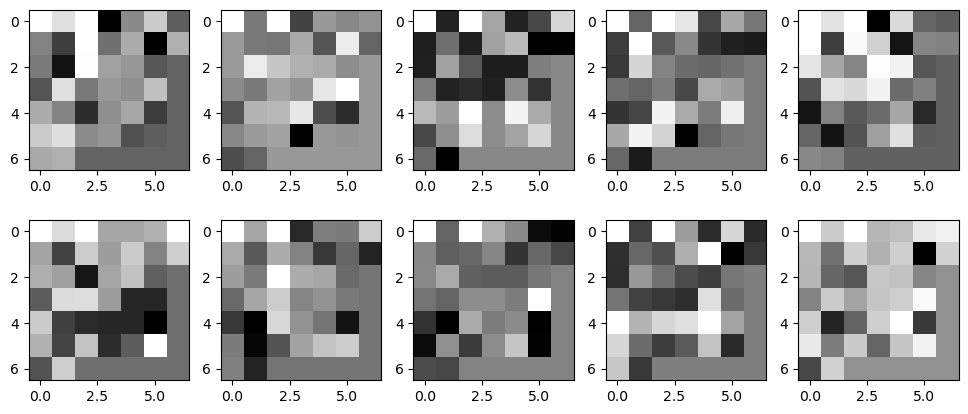

In [412]:
with open(os.path.join('data', 'images.npy'), 'rb') as f:
    images = np.load(f)
    
print('Shape:', images.shape)
show_images(images[:10], n_row=2, n_col=5, figsize=[12,5])

## Data Exploration & Preparation

### 1. Descriptive Analysis

In [413]:
data = df.iloc[:, :-1]
print(data.shape)
y = df['target']
print(y.shape)

numerical_features = data.describe(include=[np.number])
categorical_features = data.describe(include=[object])
print(numerical_features.shape)
print(categorical_features.shape)

print(categorical_features)


(61305, 40)
(61305,)
(8, 20)
(4, 20)
          V0     V1     V2     V3     V4     V5    V15    V16    V17   V18  \
count   2728  61305  61305  61305  61298  61305  61305  61305  61301  2728   
unique     2      3      3     73     16      2     32   1021      4     2   
top       C0     C1     C1    C73    C13     C0     C3   C718     C0    C0   
freq    2662  34767  34767   3692  12714  59832  14567   1838  50437  2678   

          V21    V22    V23    V24    V25    V26    V27    V35    V36    V37  
count   61301  61298  61301  61297  59401  61305  61305  58712  58717  61305  
unique     12    822      4      3    133     37    150      3      4     10  
top        C5   C152     C2     C0     C7    C32    C41     C1     C2     C6  
freq    27232  12300  20999  59215  11194  10842   3063  29095  29095   7870  


### 2. Detection and Handling of Missing Values

In [414]:
nan_present = df.isna()
## observe features with high missing NaN values
nan_present_ratio = nan_present.mean()

In [415]:

def drop_nan_columns(df, nan_threshold=0.5):
    df.dropna(axis=1, thresh=(df.shape[0] * nan_threshold), inplace=True)
    return df

def input_missing_values(df):
    '''
    Input a missing numerical feature with its mean and input a missing categorical feature
    with its mode.
    '''
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    categorical_cols = df.select_dtypes(include=[object]).columns
    df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
    df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])
    return df


In [416]:

print(df.shape)
df = drop_nan_columns(df)
print(df.shape)
df = input_missing_values(df)


(61305, 41)
(61305, 39)


### 3. Detection and Handling of Outliers

In [417]:
def replace_outliers_column(col):
    '''
    Replace outliers with median of the feature variable
    Outliers are identified based on the interquartile range
    '''
    q25 = np.percentile(col, 25)
    q75 = np.percentile(col, 75)

    iqr = q75 - q25
    cutoff = iqr * 1.5
    lower_threshold, upper_threshold = q25 - cutoff, q75 + cutoff
    upper_array = np.array(col > upper_threshold)
    lower_array = np.array(col < lower_threshold)
    col[upper_array | lower_array] = np.median(col)
    return col

def replace_outliers_df(df):
    '''
    Replace outliers present in the dataframe
    Outliers are only removed from numeric columns of the dataframe
    '''
    cols_to_exclude = ['target']
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        if col not in cols_to_exclude:
            df[col] = replace_outliers_column(df[col])
    return df


In [418]:

filtered_df = replace_outliers_df(df)
print(filtered_df.shape)

(61305, 39)


/var/folders/3z/8c224cr557584rg74pbgvqx40000gp/T/ipykernel_4833/2155460250.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col[upper_array | lower_array] = np.median(col)


### 4. Detection and Handling of Class Imbalance

In [419]:
print(filtered_df['target'].value_counts())

def oversample(df):
    majority = df[df['target'] == 0]
    minority = df[df['target'] == 1]

    sample = minority.sample(n=majority.shape[0], replace=True, random_state=1)
    oversample = pd.concat([majority, sample], axis=0)
    return oversample

def undersample(df):
    majority = df[df['target'] == 0]
    minority = df[df['target'] == 1]

    sample = majority.sample(n=minority.shape[0], replace=True, random_state=1)
    undersample = pd.concat([sample, minority], axis=0)
    return undersample


0    54115
1     7190
Name: target, dtype: int64


In [420]:
nan_present_images = np.isnan(images)
images[nan_present_images] = 0
print(images.shape)
images = images.reshape((-1, 49))
print(images.shape)

images_pd = pd.DataFrame(images)
train_df = pd.concat((data, images_pd, y), axis=1)
print(train_df.info())

oversample_df = oversample(df)
print(oversample_df.shape)
print(oversample_df['target'].value_counts())
print(oversample_df.info()) # 33 MB

undersample_df = undersample(df)
print(undersample_df.shape)
print(undersample_df['target'].value_counts())
print(undersample_df.info()) # 4 MB


(61305, 7, 7)
(61305, 49)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61305 entries, 0 to 61304
Data columns (total 90 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0      2728 non-null   object 
 1   V1      61305 non-null  object 
 2   V2      61305 non-null  object 
 3   V3      61305 non-null  object 
 4   V4      61298 non-null  object 
 5   V5      61305 non-null  object 
 6   V6      61288 non-null  float64
 7   V7      61288 non-null  float64
 8   V8      61288 non-null  float64
 9   V9      61288 non-null  float64
 10  V10     61288 non-null  float64
 11  V11     61042 non-null  float64
 12  V12     61042 non-null  float64
 13  V13     61042 non-null  float64
 14  V14     61042 non-null  float64
 15  V15     61305 non-null  object 
 16  V16     61305 non-null  object 
 17  V17     61301 non-null  object 
 18  V18     2728 non-null   object 
 19  V19     61305 non-null  float64
 20  V20     61305 non-null  float64
 21  V21     6

In [421]:
train_df = pd.concat((data, images_pd, y), axis=1)
oversample_df = oversample(df)
print(oversample_df.shape)
print(oversample_df['target'].value_counts())
print(oversample_df.info()) # 33 MB

undersample_df = undersample(df)
print(undersample_df.shape)
print(undersample_df['target'].value_counts())
print(undersample_df.info()) # 4 MB


(108230, 39)
0    54115
1    54115
Name: target, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 108230 entries, 0 to 42868
Data columns (total 39 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      108230 non-null  object 
 1   V2      108230 non-null  object 
 2   V3      108230 non-null  object 
 3   V4      108230 non-null  object 
 4   V5      108230 non-null  object 
 5   V6      108230 non-null  float64
 6   V7      108230 non-null  float64
 7   V8      108230 non-null  float64
 8   V9      108230 non-null  float64
 9   V10     108230 non-null  float64
 10  V11     108230 non-null  float64
 11  V12     108230 non-null  float64
 12  V13     108230 non-null  float64
 13  V14     108230 non-null  float64
 14  V15     108230 non-null  object 
 15  V16     108230 non-null  object 
 16  V17     108230 non-null  object 
 17  V19     108230 non-null  float64
 18  V20     108230 non-null  float64
 19  V21     108230 non-null  

### 5. Understanding Relationship Between Variables

<AxesSubplot:>

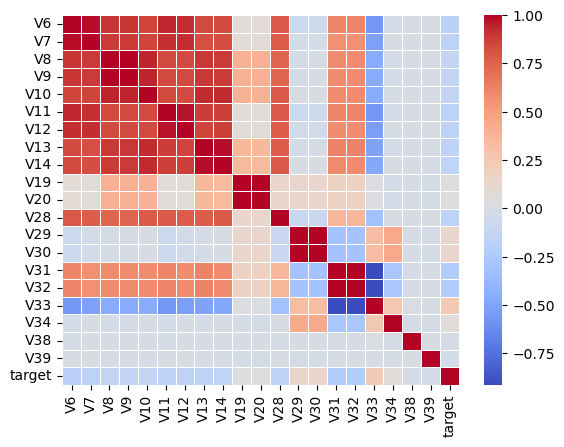

In [422]:
correlations = oversample_df.corr(method='pearson', numeric_only=True)
# refer to 6. Data Visualisation for continuation

### 6. Data Visualization

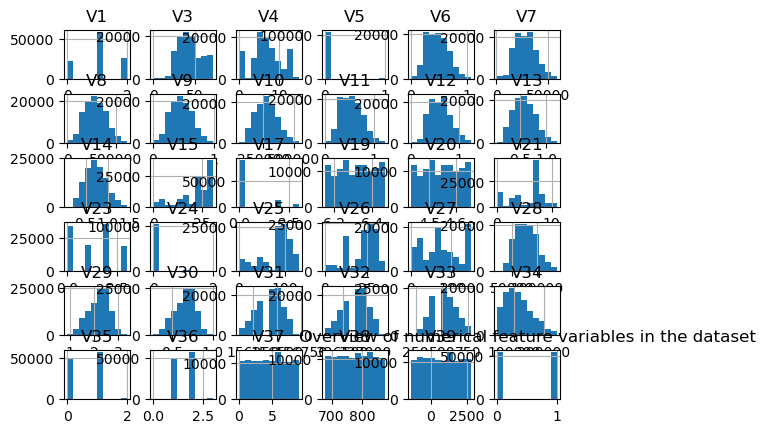

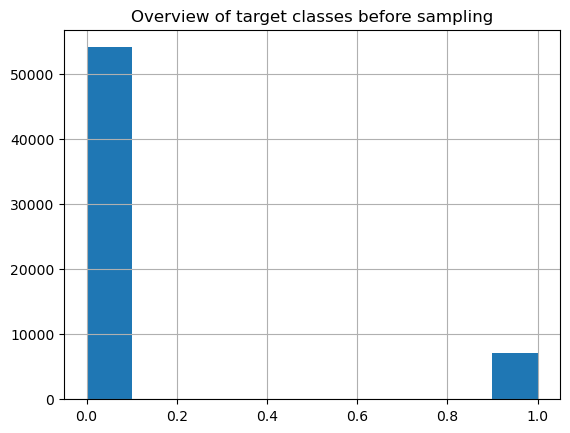

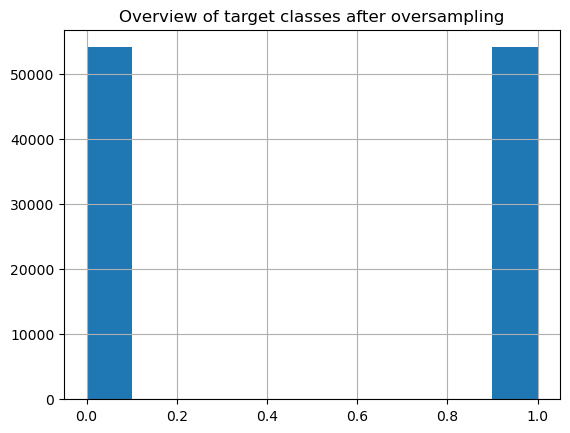

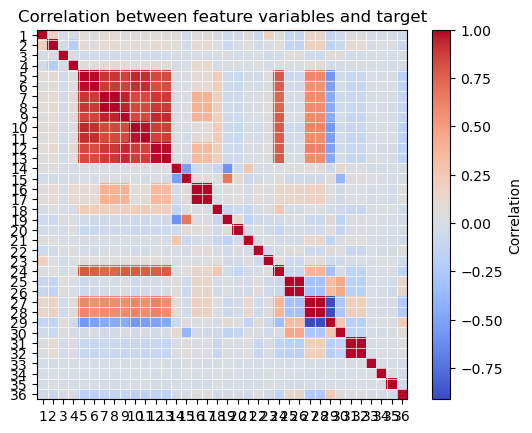

In [467]:
oversample_df.hist()
plt.title("Overview of numerical feature variables in the dataset")
plt.show()

df['target'].hist()
plt.title("Overview of target classes before sampling")
plt.show()

oversample_df['target'].hist()
plt.title("Overview of target classes after oversampling")
plt.show()

#sns.heatmap(correlations, linewidth=0.5, cmap='coolwarm')
# Create a heatmap using matplotlib
fig, ax = plt.subplots()
heatmap = ax.imshow(correlations, cmap='coolwarm')

# Add colorbar
cbar = plt.colorbar(heatmap)

# Set ticks and labels for x and y axes
ax.set_xticks(np.arange(correlations.shape[1]))
ax.set_yticks(np.arange(correlations.shape[0]))
ax.set_xticklabels(np.arange(correlations.shape[1]) + 1)
ax.set_yticklabels(np.arange(correlations.shape[0]) + 1)

# Add grid lines
ax.set_xticks(np.arange(correlations.shape[1] + 1) - 0.5, minor=True)
ax.set_yticks(np.arange(correlations.shape[0] + 1) - 0.5, minor=True)
ax.grid(which='minor', color='w', linewidth=0.5)
ax.tick_params(which='minor', bottom=False, left=False)

# Add colorbar label
cbar.set_label('Correlation')

# Set title and show plot
ax.set_title('Correlation Heatmap')
plt.title("Correlation between feature variables and target")
plt.show()



## Data Preprocessing

### 7. General Preprocessing

In [424]:
def get_duplicate_columns(df):
    '''
    Identify duplicate columns present in a dataframe
    '''
    duplicateColumnNames = set()

    for x in range(df.shape[1]):
        col = df.iloc[:, x]
        for y in range(x + 1, df.shape[1]):
            otherCol = df.iloc[:, y]
             
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
    return list(duplicateColumnNames)


In [425]:
def drop_duplicate_features(df):
    dup = get_duplicate_columns(df)
    df = df.drop(columns=dup)
    return df

In [426]:
def format_categories(df, threshold):
    '''
    Converts dtype of Object (String) to `int` for machine learning if the number of unique classes
    are less than the threshold
    '''
    col_to_exclude = ['target']
    cols_to_convert = df.columns[(df.nunique() < threshold) \
                                    & (~df.columns.isin(col_to_exclude)) \
                                    & (df.dtypes == 'object')]
    df[cols_to_convert] = df[cols_to_convert].astype('category').apply(lambda x: x.cat.codes)
    return df

In [427]:

print(get_duplicate_columns(oversample_df))
oversample_df = drop_duplicate_features(oversample_df)

['V2']


In [428]:
# Observe the number of unique categories for each categorical feature variable
unique_counts = pd.DataFrame.from_records([(col, oversample_df[col].nunique()) for col in oversample_df.columns if oversample_df[col].dtype == 'object'],
                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])
print(unique_counts)

   Column_Name  Num_Unique
3           V5           2
0           V1           3
14         V35           3
10         V24           3
9          V23           4
15         V36           4
6          V17           4
16         V37          10
7          V21          12
2           V4          16
4          V15          32
12         V26          37
1           V3          73
11         V25         133
13         V27         150
8          V22         822
5          V16        1021


In [429]:
formatted_df = format_categories(oversample_df, threshold=200)
formatted_df.head()

,V1,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V31,V32,V33,V34,V35,V36,V37,V38,V39,target
0,1,58,8,0,593467.0,36804.0,473651.0,763304.0,475018.0,642970.0,...,156574.0,327088.0,420.0,149982.0,1,2,6,846,148,0
1,1,29,8,0,502611.0,29428.0,256499.0,413448.0,239103.0,584735.0,...,156340.0,326602.0,564.0,67182.0,0,1,5,866,-1154,0
2,2,37,8,0,130495.0,9828.0,80063.0,129190.0,85635.0,151155.0,...,156106.0,326116.0,780.0,231402.0,1,2,9,688,1513,0
3,1,41,4,0,357881.0,22844.0,268379.0,432588.0,240843.0,376780.0,...,156262.0,326440.0,708.0,112906.0,0,1,8,804,2647,0
4,1,52,8,0,789119.0,49184.0,482255.0,777166.0,464491.0,945545.0,...,156496.0,326926.0,492.0,149982.0,0,1,4,800,-146,0


### 8. Feature Selection

In [468]:
correlations = formatted_df.corr(method='pearson', numeric_only=True)
#sns.heatmap(correlations, linewidth=0.5, cmap='coolwarm')

In [431]:
formatted_df.drop(columns=['V22', 'V16'], inplace=True)

In [432]:
X = formatted_df.iloc[:, :-1]
y_tabular = formatted_df.iloc[:, -1]
print(X.shape)
pca = PCA(n_components=5)
pca.fit(X)
X = pca.transform(X)
print(X.shape)

(108230, 35)
(108230, 5)


### 9. Feature Engineering

## Modeling & Evaluation

### 10. Creating models

In [462]:

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [433]:
class MLP(nn.Module):
    def __init__(self, n_dim, n_classes):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(n_dim, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, n_classes)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        return x


In [434]:
class CNN(nn.Module):
    def __init__(self, in_channels):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, 16, kernel_size=3)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, kernel_size=2)
        x = F.relu(self.conv2d(x))
        x = F.max_pool2d(x, kernel_size=2)
        x = x.view(x.size(0), -1)
        return x

In [466]:
class ConcatenatedModel(nn.Module):
    def __init__(self, n_dim, in_channels):
        super(ConcatenatedModel, self).__init__()
        self.mlp = MLP(n_dim)
        self.cnn = CNN(in_channels)
        self.fc3 = nn.Linear(16 + 32 * 2 * 2, 1)

    def forward(self, tabular_data, img_data):
        x_tabular = self.mlp(tabular_data)
        x_image = self.cnn(img_data)
        x = torch.cat((x_tabular, x_image), dim=1)
        x = F.relu(self.fc3(x))
        return x

In [435]:
def get_accuracy(scores, labels):
    """
    Helper function that returns accuracy of model for MLP
    
    Parameters
    ----------
        scores : The raw softmax scores of the network
        label : The ground truth labels
        
    Returns
    -------
        Accuracy of the model. Return a number in range [0, 1].
        0 means 0% accuracy while 1 means 100% accuracy
    """
    _, predictions = torch.max(scores, 1)
    positive = torch.sum(predictions == labels).int()
    return positive / scores.shape[0]

In [436]:
num_epochs = 10

# originally, used 10 features with PCA
MLP_model = MLP(10, 2)
CNN_model = CNN(1)

In [437]:
tabular_data = X
y_tabular = y_tabular.values

In [438]:
train_tabular, test_tabular, train_y, test_y = train_test_split(tabular_data, y_tabular, test_size=0.2, random_state=2109)
train_tabular = torch.from_numpy(train_tabular).float()
test_tabular = torch.from_numpy(test_tabular).float()
train_y = torch.from_numpy(train_y).long()
test_y = torch.from_numpy(test_y).long()

In [439]:
train_images, test_images, train_y_images, test_y_images = train_test_split(images, y,test_size=0.2, random_state=2109)

### 11. Model Evaluation

In [444]:
# Exclude target column
X_columns = [col for col in df.columns if col != 'target']

# Create X_dict and y
X_dict = {
    'tabular': df[X_columns],
    'images': images
}
y = df['target']

X_dict_train, y_train, X_dict_test, y_test = dict_train_test_split(X_dict, y, ratio=0.9)

In [445]:
from sklearn.preprocessing import MinMaxScaler
def select_features(tabular_x):
    tabular_x.drop(columns=['V16', 'V22'], inplace=True)
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(tabular_x)
    #pca = PCA(n_components=10)
    #pca.fit(tabular_x)
    #tabular_x = pca.transform(tabular_x)
    return pd.DataFrame(scaled)

def clean_images(images):
    nan_present_images = np.isnan(images)
    images[nan_present_images] = 0
    images = images.reshape((-1, 49))
    images_pd = pd.DataFrame(images)
    return images_pd

def process_attributes(tabular_data, images, y):
    tabular_data = handle_nan(tabular_data)
    tabular_data = replace_outliers_df(tabular_data)
    processed = drop_duplicate_features(tabular_data)
    processed = format_categories(processed, 155)
    processed = select_features(processed)
    flattened_images = clean_images(images)
    combined_inputs = pd.concat((processed, flattened_images, y), axis=1)
    balance_data = undersample(combined_inputs)
    return balance_data

def process_test(tabular_data, images):
    tabular_data = handle_nan(tabular_data)
    tabular_data = replace_outliers_df(tabular_data)
    tabular_data = drop_duplicate_features(tabular_data)
    processed = format_categories(tabular_data, 155)
    processed = select_features(processed)
    processed.reset_index(drop=True, inplace=True)
    flattened_images = clean_images(images)
    flattened_images.reset_index(drop=True, inplace=True)
    combined_inputs = pd.concat([processed, flattened_images], axis=1)
    return combined_inputs

In [453]:
x_df = X_dict_train['tabular']
x_images = X_dict_train['images']
train_df = process_attributes(x_df, x_images, y_train)
train_x = train_df.iloc[:,:-1]
train_y = train_df.iloc[:,-1]

test_df = X_dict_test['tabular']
test_images = X_dict_test['images']

x_combined_test = process_test(test_df, test_images)


/var/folders/3z/8c224cr557584rg74pbgvqx40000gp/T/ipykernel_4833/508597846.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=1, thresh=(df.shape[0] * nan_threshold), inplace=True)
/var/folders/3z/8c224cr557584rg74pbgvqx40000gp/T/ipykernel_4833/508597846.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
/var/folders/3z/8c224cr557584rg74pbgvqx40000gp/T/ipykernel_4833/508597846.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [459]:
random_forest = RandomForestClassifier()
random_forest.fit(train_x, train_y)

y_pred = random_forest.predict(x_combined_test)
print("====== Random Forest Classifier  =======")
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1: ", metrics.accuracy_score(y_test, y_pred))

====== Random Forest Classifier  =======
Precision: 0.22991287512100678
Recall: 0.665266106442577
F1:  0.7015168814222802


In [464]:

logistic_reg = LogisticRegression(solver='lbfgs')
logistic_reg.fit(train_x, train_y)
y_pred = logistic_reg.predict(x_combined_test)

print("====== Logistic Regression =======")
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1: ", metrics.accuracy_score(y_test, y_pred))

====== Logistic Regression =======
Precision: 0.2564876282438141
Recall: 0.5952380952380952
F1:  0.75191648996901


/Users/arkar/opt/anaconda3/envs/cs2109s-ay2223s1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [460]:
gb_untuned = GradientBoostingClassifier()

gb_untuned.fit(train_x, train_y)
y_pred = gb_untuned.predict(x_combined_test)
print("====== Gradient Boosting Classifier =======")
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1: ", metrics.accuracy_score(y_test, y_pred))


====== Gradient Boosting Classifier =======
Precision: 0.2626321974148061
Recall: 0.6260504201680672
F1:  0.7517533844397325


### 12. Hyperparameters Search

In [447]:
from sklearn.model_selection import GridSearchCV

grid = {
    'learning_rate':[0.01, 0.05, 0.1],
    'n_estimators':np.arange(100,500,100),
}

rf_cv = GridSearchCV(gb_untuned, grid, cv = 4)
rf_cv.fit(train_x, train_y) # runtime = 26min

# learning rate = 0.05, n_estimators = 400

print("Best Params:", rf_cv.best_params_)


Best Params: {'learning_rate': 0.05, 'n_estimators': 400}


In [448]:

print(rf_cv.best_score_)

0.6991970352069178


In [449]:
grid = {'max_depth':[2,3,4,5,6,7] }

gb = GradientBoostingClassifier(learning_rate=0.05,n_estimators=400)

gb_cv = GridSearchCV(gb, grid, cv = 4)

gb_cv.fit(train_x, train_y)

print("Best Parameters:",gb_cv.best_params_)

print("Train Score:",gb_cv.best_score_)


Best Parameters: {'max_depth': 6}
Train Score: 0.7022853613341569


In [450]:
grid = {'max_features':[2,3,4,5,6,7] }

gb = GradientBoostingClassifier(learning_rate=0.05,n_estimators=400, max_depth=6)

gb_cv = GridSearchCV(gb, grid, cv = 4)

gb_cv.fit(train_x, train_y)

print("Best Parameters:",gb_cv.best_params_)

print("Train Score:",gb_cv.best_score_)

Best Parameters: {'max_features': 6}
Train Score: 0.7049104385423101


In [465]:
gb = GradientBoostingClassifier(learning_rate=0.05, n_estimators=400, max_depth=6, max_features=6)

gb.fit(train_x, train_y)
y_pred = gb.predict(x_combined_test)
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1: ", metrics.accuracy_score(y_test, y_pred))


Precision: 0.25077720207253884
Recall: 0.6778711484593838
F1:  0.7266351329310063


In [1]:
import psutil

# Get the memory usage of the current process (Jupyter Notebook)
process = psutil.Process()
memory_info = process.memory_info()
memory_usage = memory_info.rss

# Convert the memory usage to human-readable format
memory_usage_mb = memory_usage / (1024 * 1024)  # Convert from bytes to megabytes

print(f"Memory usage of Jupyter Notebook: {memory_usage_mb:.2f} MB")

Memory usage of Jupyter Notebook: 65.38 MB
